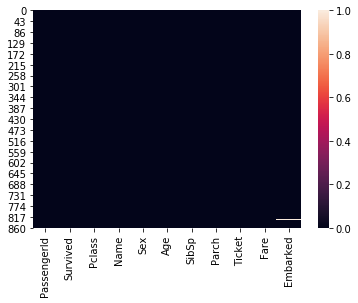

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df =pd.read_csv("train.csv")
df
mn=df[['Age']].mean()
df.Age=df[['Age']].fillna(mn)
df.style.format({'Age': '{:,.2f}'.format})
df.drop('Cabin',axis=1,inplace=True)
sns.heatmap(df.isnull())

In [3]:
sx = pd.get_dummies(df['Sex'],drop_first=True)
em = pd.get_dummies(df['Embarked'],drop_first=True)
df = pd.concat([df,sx,em],axis=1)
df.drop(['PassengerId','Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, [5,6,7]], df.iloc[:, [0]], test_size=0.3,random_state=2) 

In [5]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) 

C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
from sklearn.linear_model import LogisticRegression
predictions = logmodel.predict(X_test)
print(predictions)

[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1]


[[137  40]
 [ 23  68]]
76.49253731343283 2


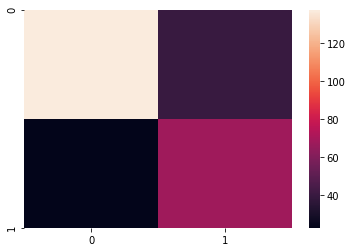

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cmf=confusion_matrix(predictions,y_test)
print(cmf)
print(accuracy_score(y_test,predictions)* 100, 2)
sns.heatmap(cmf)